In [81]:
import os
import pandas as pd
import re
from collections import defaultdict

for i in range(1,22):
    folder_path = f'D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\Pt{i}' 
    folder_name = f'D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq'
    output_folder = os.path.join(folder_name, f"diffs\Pt{i}")
    os.makedirs(output_folder, exist_ok=True)

    pattern = re.compile(r"(\d+)_Pt(\d+)_(F|R)_(\w+)\.csv")  
    files = os.listdir(folder_path)
    file_dict = defaultdict(dict)

    for file in files:
        match = pattern.match(file)
        if match:
            time, patient, disease, gene = match.groups()
            time, patient = int(time), int(patient)
            key = (patient, gene)
            file_dict[key][time] = (os.path.join(folder_path, file), disease)

    for (patient, gene), time_files in file_dict.items():
        sorted_times = sorted(time_files.keys())
        for i in range(1, len(sorted_times)):
            t1, t2 = sorted_times[i - 1], sorted_times[i]
            file1, disease1 = time_files[t1]
            file2, disease2 = time_files[t2]
            df1 = pd.read_csv(file1, index_col=0)
            df2 = pd.read_csv(file2, index_col=0)
            all_genes = df1.index.union(df2.index)
            df1 = df1.reindex(all_genes, fill_value=0) # fill missing values with 0
            df2 = df2.reindex(all_genes, fill_value=0)  # fill missing values with 0
            diff_df = df2 - df1
            disease_change = f"{disease2}-{disease1}" 
            output_filename = f"{t2}-{t1}_Pt{patient}_{gene}_{disease_change}.csv"
            diff_df.to_csv(os.path.join(output_folder, output_filename))
    
    print(f"Processed Pt{i}")

Processed Pt3
Processed Pt1
Processed Pt1
Processed Pt1
Processed Pt5
Processed Pt2
Processed Pt1
Processed Pt1
Processed Pt3
Processed Pt1
Processed Pt3
Processed Pt1
Processed Pt2
Processed Pt2
Processed Pt2
Processed Pt2
Processed Pt1
Processed Pt2
Processed Pt3
Processed Pt2
Processed Pt3


In [13]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

file_path = r'D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\merged_results\v_concatenated_dropped.csv'  # 确保文件路径正确
df = pd.read_csv(file_path)

df_cleaned = df.drop(columns=["Unnamed: 0"])

X = df_cleaned.drop(columns=["transition_type"])
y = df_cleaned["transition_type"]

X.fillna(0, inplace=True)

X = X.apply(pd.to_numeric, errors='coerce')

mi_scores = mutual_info_classif(X, y, discrete_features=False, random_state=42)

mi_results = pd.DataFrame({"Feature": X.columns, "MI_Score": mi_scores})
mi_results = mi_results.sort_values(by="MI_Score", ascending=False)

print(mi_results.head(50))


                                         Feature  MI_Score
405                             TRBV7-1, TRBV7-4  0.349613
198  TRBV6-6, TRBV6-5, TRBV6-9, TRBV6-1, TRBV6-8  0.284327
103           TRBV6-5, TRBV6-1, TRBV6-6, TRBV6-3  0.273074
234                    TRBV7-3, TRBV7-4, TRBV7-9  0.265804
129           TRBV6-6, TRBV6-5, TRBV6-1, TRBV6-3  0.257659
122  TRBV6-5, TRBV6-6, TRBV6-3, TRBV6-8, TRBV6-2  0.241184
135  TRBV6-6, TRBV6-5, TRBV6-3, TRBV6-2, TRBV6-8  0.227583
308                    TRBV7-3, TRBV7-8, TRBV7-2  0.220540
312                    TRBV7-9, TRBV7-2, TRBV7-6  0.212311
212                    TRBV6-2, TRBV6-3, TRBV6-9  0.212125
309                             TRBV7-6, TRBV7-3  0.208207
235                             TRBV7-3, TRBV7-9  0.205311
324  TRBV5-5, TRBV5-3, TRBV5-6, TRBV5-8, TRBV7-9  0.203842
399                   TRBV5-6, TRBV20-1, TRBV5-7  0.201157
427           TRBV7-2, TRBV7-6, TRBV7-9, TRBV7-8  0.191898
18                                TRBV14, TRBV28  0.1912

In [72]:
folder_path = r'D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\diffs'
for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        df = pd.read_csv(file_path)
        min_val = df['freq'].min()
        max_val = df['freq'].max()
        df['freq'] = (df['freq'] - min_val) / (max_val - min_val)
        df.to_csv(file_path, index=False)
print("Normalization complete.")

Normalization complete.


In [73]:
# import pandas as pd
# import os
# from collections import defaultdict

# folder_path = r'D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\diffs'

for root, dirs, files in os.walk(folder_path):
    for file in files:
        file_path = os.path.join(root, file)
        df = pd.read_csv(file_path)
        df_transposed = df.set_index("gene_segment").T
        df_transposed.to_csv(file_path, index=False)
        print(f"Processed {file_path}")



Processed D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\diffs\Pt1\2-1_Pt1_d_R-F.csv
Processed D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\diffs\Pt1\2-1_Pt1_j_R-F.csv
Processed D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\diffs\Pt1\2-1_Pt1_v_R-F.csv
Processed D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\diffs\Pt1\3-2_Pt1_d_F-R.csv
Processed D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\diffs\Pt1\3-2_Pt1_j_F-R.csv
Processed D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\diffs\Pt1\3-2_Pt1_v_F-R.csv
Processed D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\diffs\Pt1\4-3_Pt1_d_R-F.csv
Processed D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\diffs\Pt1\4-3_Pt1_j_R-F.csv
Processed D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\diffs\Pt1\4-3_Pt1_v_R-F.csv
Processed D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\diffs\Pt10\2-1_Pt10_d_R-F.csv
Processed D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\dif

In [4]:
import os
import pandas as pd
from collections import defaultdict

folder_path = r"D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\diffs" 

file_dict = defaultdict(lambda: defaultdict(list))

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if "_" in file and file.endswith(".csv"):  
            parts = file.rsplit("_", 2)  
            if len(parts) == 3:
                transition_type = parts[-1].replace(".csv", "") 
                gene_name = parts[-2]  
                file_path = os.path.join(root, file)

           
                df = pd.read_csv(file_path)
                file_dict[transition_type][gene_name].append(df)

output_dir = "concatenated_results"
os.makedirs(output_dir, exist_ok=True)

for transition_type, gene_dict in file_dict.items():
    for gene_name, df_list in gene_dict.items():
        if df_list:
            if transition_type == "F-F":
                merged_df = pd.concat(df_list, axis=0)
                merged_df.insert(0, "transition_type", 4)
            elif transition_type == "R-R":
                merged_df = pd.concat(df_list, axis=0)
                merged_df.insert(0, "transition_type", 3)
            elif transition_type == "F-R":
                merged_df = pd.concat(df_list, axis=0)
                merged_df.insert(0, "transition_type", 2)
            else:
                merged_df = pd.concat(df_list, axis=0)
                merged_df.insert(0, "transition_type", 1)
            output_file = os.path.join(output_dir, f"{transition_type}_{gene_name}_concatenated.csv")
            merged_df.to_csv(output_file)
            print(f" {transition_type} - {gene_name} processed data saved as {output_file}")


 R-F - d processed data saved as concatenated_results\R-F_d_concatenated.csv
 R-F - j processed data saved as concatenated_results\R-F_j_concatenated.csv
 R-F - v processed data saved as concatenated_results\R-F_v_concatenated.csv
 F-R - d processed data saved as concatenated_results\F-R_d_concatenated.csv
 F-R - j processed data saved as concatenated_results\F-R_j_concatenated.csv
 F-R - v processed data saved as concatenated_results\F-R_v_concatenated.csv
 R-R - d processed data saved as concatenated_results\R-R_d_concatenated.csv
 R-R - j processed data saved as concatenated_results\R-R_j_concatenated.csv
 R-R - v processed data saved as concatenated_results\R-R_v_concatenated.csv
 F-F - d processed data saved as concatenated_results\F-F_d_concatenated.csv
 F-F - j processed data saved as concatenated_results\F-F_j_concatenated.csv
 F-F - v processed data saved as concatenated_results\F-F_v_concatenated.csv


In [ ]:
for root, dirs, files in os.walk(folder_path):
    for file in files:
        if "_" in file and file.endswith(".csv"):
            parts = file.rsplit("_", 2)
            if len(parts) == 3:
                transition_type = parts[-1].replace(".csv", "")
                gene_name = parts[-2]
                if gene_name == "v":
                    file_path = os.path.join(root, file)
                    df = pd.read_csv(file_path)
                    


In [3]:
import os
import pandas as pd

folder_path = "D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\concatenated_results" 
file_dict = {}

for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        parts = file.split("_")
        gene_name = parts[1]     
        file_path = os.path.join(folder_path, file)

        df = pd.read_csv(file_path)

        if gene_name not in file_dict:
            file_dict[gene_name] = []
        file_dict[gene_name].append(df)

output_dir = "merged_results"
os.makedirs(output_dir, exist_ok=True)

for gene, df_list in file_dict.items():
    merged_df = pd.concat(df_list, axis=0, ignore_index=True)  
    output_file = os.path.join(output_dir, f"{gene}_concatenated.csv")
    merged_df.to_csv(output_file, index=False)
    print(f" {gene} caoncat, saved as {output_file}")


 d caoncat, saved as merged_results\d_concatenated.csv
 j caoncat, saved as merged_results\j_concatenated.csv
 v caoncat, saved as merged_results\v_concatenated.csv


In [18]:
df = pd.read_csv(r"D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\merged_results\v_concatenated.csv")
df = df.dropna(axis=1, how='any')
df = df.fillna(0)
# df.to_csv(r"D:\desktop\PCM__EHR\pigeon\data\TCR Data with VDJ freq\merged_results\j_concatenated_dropped.csv", index=False)
print(df)

    Unnamed: 0  transition_type  TRBV10-1  TRBV10-3  TRBV11-2  \
0            0                4  0.657324  0.642760  0.728414   
1            0                4  0.308540  0.457413  0.180049   
2            0                4  0.327121  0.627377  0.508624   
3            0                4  0.437578  0.318697  0.370588   
4            0                4  0.402764  0.359297  0.467972   
5            0                4  0.695457  0.625352  0.000000   
6            0                4  0.543846  1.000000  0.561556   
7            0                4  0.723964  0.000000  0.747991   
8            0                4  0.685157  0.681765  0.696667   
9            0                2  0.502711  0.590655  0.502858   
10           0                2  0.372417  0.375979  0.305821   
11           0                2  0.483809  0.468350  0.488377   
12           0                2  0.341197  0.154753  1.000000   
13           0                2  0.426576  0.525788  0.206483   
14           0           

In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor  


In [20]:
X = df.drop(columns=['transition_type', 'Unnamed: 0'])  
y = df['transition_type']  
print(X)



    TRBV10-1  TRBV10-3  TRBV11-2  TRBV11-3, TRBV11-1    TRBV15    TRBV18  \
0   0.657324  0.642760  0.728414            0.674698  0.674188  0.692833   
1   0.308540  0.457413  0.180049            0.315208  0.420725  0.295211   
2   0.327121  0.627377  0.508624            0.494134  0.400478  0.502494   
3   0.437578  0.318697  0.370588            0.360305  0.727662  0.392366   
4   0.402764  0.359297  0.467972            0.457976  0.505855  0.350213   
5   0.695457  0.625352  0.000000            0.446941  0.280984  0.510947   
6   0.543846  1.000000  0.561556            0.566632  0.853947  0.465956   
7   0.723964  0.000000  0.747991            0.677710  0.759889  0.871003   
8   0.685157  0.681765  0.696667            0.710798  1.000000  0.698000   
9   0.502711  0.590655  0.502858            0.501767  0.501143  0.502255   
10  0.372417  0.375979  0.305821            0.273004  0.358216  0.308965   
11  0.483809  0.468350  0.488377            0.556654  0.825339  0.461227   
12  0.341197

In [24]:

model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X, y)


RandomForestClassifier(n_estimators=1000, random_state=42)

In [25]:
importances = model.feature_importances_


In [33]:
from sklearn.feature_selection import RFE
num_features_to_select = 10
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

rfe.fit(X, y)

selected_features = X.columns[rfe.support_]

print("Selected Features:", selected_features)

Selected Features: Index(['TRBV10-3', 'TRBV15', 'TRBV18', 'TRBV19', 'TRBV20-1', 'TRBV24-1',
       'TRBV27', 'TRBV29-1', 'TRBV6-1, TRBV6-5, TRBV6-6, TRBV6-8, TRBV6-9',
       'TRBV6-4'],
      dtype='object')


In [37]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()[::-1]  
top_n = 10 
selected_features = X.columns[sorted_idx[:top_n]]

print("Selected Features:", selected_features)

Selected Features: Index(['TRBV9', 'TRBV7-9, TRBV7-6', 'TRBV4-1, TRBV4-3', 'TRBV29-1', 'TRBV28',
       'TRBV27', 'TRBV25-1', 'TRBV24-1', 'TRBV21-1', 'TRBV20-1'],
      dtype='object')


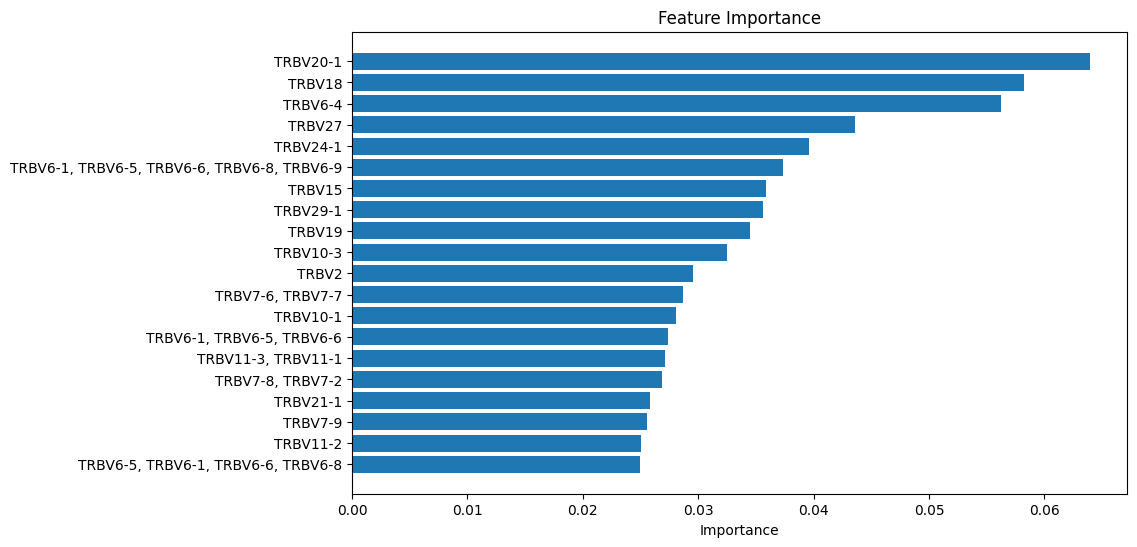

In [26]:
import matplotlib.pyplot as plt
import numpy as np

features = X.columns

indices = np.argsort(importances)[::-1]
top20_indices = indices[:20]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(20), importances[top20_indices], align="center")
plt.yticks(range(20), features[top20_indices])
plt.gca().invert_yaxis()  
plt.xlabel("Importance")
plt.show()
